In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

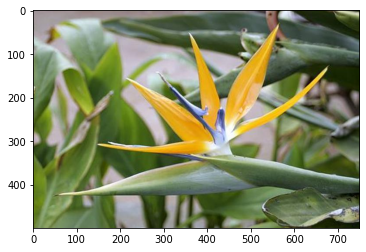

In [11]:
image = cv2.imread('image_03288.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

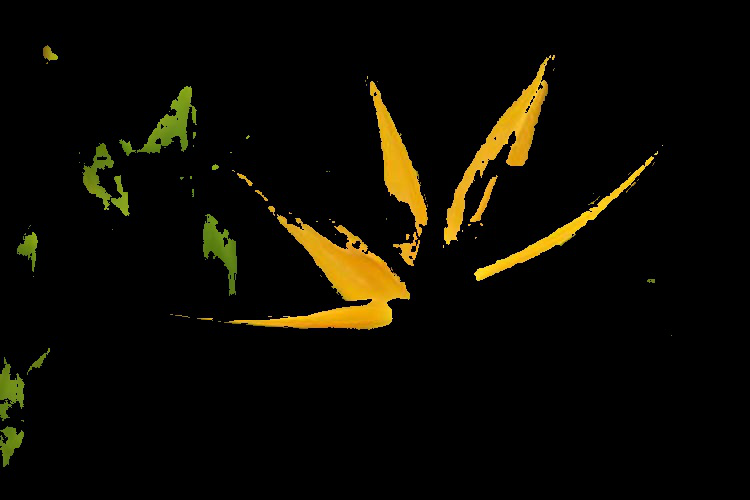

In [12]:
min_HSV = np.array([0, 200, 120], dtype = "uint8")
max_HSV = np.array([180,255, 255], dtype = "uint8")
# Get pointer to video frames from primary device
image = cv2.imread("image_03288.jpg")
imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
RegionHSV = cv2.inRange(imageHSV, min_HSV, max_HSV)

petalHSV = cv2.bitwise_and(image, image, mask = RegionHSV)

cv2.imwrite("image.jpeg", np.hstack([petalHSV]))
PIL.Image.open("image.jpeg")

In [2]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [3]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)


    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)


    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    #if (show_chart):
        #plt.figure(figsize = (8, 6))
        #plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

In [46]:
rgb_color=get_colors(get_image('image2.jpeg'), 2, True)

In [4]:
from pathlib import Path
import csv
from csv import writer
import os
disk_dir = Path("img/")
def store_many_disk(images, labels):
    """ Stores an array of images to disk
        Parameters:
        ---------------
        images       images array, (N, 32, 32, 3) to be stored
        labels       labels array, (N, 1) to be stored
    """
    num_images = len(images)

    # Save all the images one by one
    for i, image in enumerate(images):
        Image.fromarray(image).save(disk_dir / f"{i}.jpg")

    # Save all the labels to the csv file
    with open(disk_dir / f"{num_images}.csv", "w") as csvfile:
        writer = csv.writer(
            csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL
        )
        for label in labels:
            # This typically would be more than just one value per row
            writer.writerow([label])

In [7]:
def loop_directory(directory: str):
    '''Loop files in the directory'''

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_directory = os.path.join(directory, filename)
            min_HSV = np.array([0, 200, 120], dtype = "uint8")
            max_HSV = np.array([180,255, 255], dtype = "uint8")
            # Get pointer to video frames from primary device
            image = cv2.imread(filename)
            imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            RegionHSV = cv2.inRange(imageHSV, min_HSV, max_HSV)
            petalHSV = cv2.bitwise_and(image, image, mask = RegionHSV)
            cv2.imwrite(f"img/{filename}.jpg", np.hstack([petalHSV]))
            rgb_color=get_colors(get_image(f"img/{filename}.jpg"), 2, True)
            list=[filename,int(rgb_color[1][0]),int(rgb_color[1][1]),int(rgb_color[1][2])]
            with open('color.csv', 'a') as f_object:
                writer_object = writer(f_object) 
                writer_object.writerow(list)
                f_object.close() 

In [ ]:
a=loop_directory("images/")